In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle

In [55]:
x = pickle.load(open('x.pickle','rb'))
y = pickle.load(open('y.pickle','rb'))

x = x/255 # you can also use tf.keras.utils.normalize
y = np.array(y)


In [ ]:
y[5],x[5]

In [57]:
model = Sequential()

model.add(Conv2D(64, (3,3),input_shape = x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x,y,batch_size=32,epochs=10, validation_split=0.1)

Epoch 1/10
31/31 [==============================] - 27s 831ms/step - loss: 0.8836 - accuracy: 0.4980 - val_loss: 0.6930 - val_accuracy: 0.4818
Epoch 2/10
31/31 [==============================] - 25s 801ms/step - loss: 0.6912 - accuracy: 0.5364 - val_loss: 0.6844 - val_accuracy: 0.6000
Epoch 3/10
31/31 [==============================] - 25s 797ms/step - loss: 0.6679 - accuracy: 0.6071 - val_loss: 0.6671 - val_accuracy: 0.5818
Epoch 4/10
31/31 [==============================] - 25s 797ms/step - loss: 0.6168 - accuracy: 0.6717 - val_loss: 0.6336 - val_accuracy: 0.6273
Epoch 5/10
31/31 [==============================] - 24s 791ms/step - loss: 0.5403 - accuracy: 0.7384 - val_loss: 0.7944 - val_accuracy: 0.5727
Epoch 6/10
31/31 [==============================] - 33s 1s/step - loss: 0.4806 - accuracy: 0.7697 - val_loss: 0.7153 - val_accuracy: 0.6091
Epoch 7/10
31/31 [==============================] - 27s 843ms/step - loss: 0.3942 - accuracy: 0.8293 - val_loss: 0.7521 - val_accuracy: 0.6545
Ep

In [41]:
predictions = model.predict(x)

35/35 [==============================] - 2s 60ms/step


0


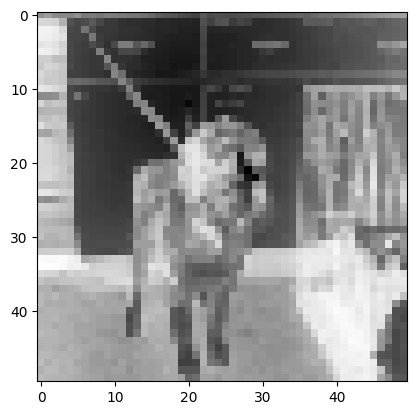

In [52]:
print(np.argmax(predictions[5]))
import matplotlib.pyplot as plt
plt.imshow(x[5],cmap=plt.cm.binary)
plt.show()